In [1]:
# 사이킷런 라이브러리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 1.1 당뇨병 예측하기

#### 데이터 불러오기

In [3]:
from sklearn.datasets import load_diabetes

# 당뇨병 데이터셋 로드
diabetes = load_diabetes()
diabetes_X = diabetes.data
diabetes_y = diabetes.target

# 데이터프레임 생성
diabetes_df = pd.DataFrame(diabetes_X, columns=diabetes.feature_names)
diabetes_y = diabetes.target
diabetes_df["target"] = diabetes_y   #TODO:YOUR_CODE_HERE

diabetes_df.tail(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081413,0.083740,0.027809,0.173816,-0.039493,-0.004222,0.003064,57.0


In [4]:
# 데이터 탐색
print(diabetes_df.head())
print(diabetes_df.describe())
print(diabetes_df.info())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-0

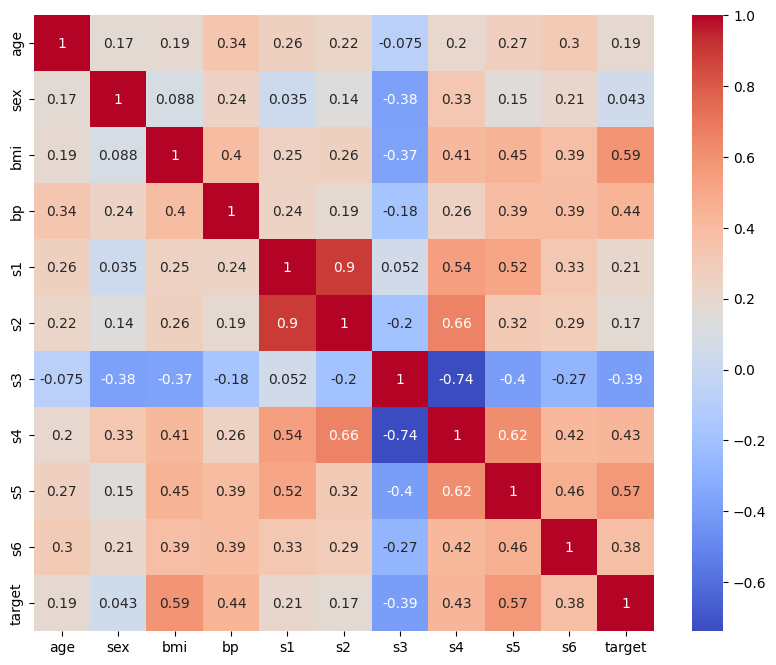

In [5]:
# 상관관계 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_df.corr(), annot=True, cmap='coolwarm')
plt.show()

#### 데이터 전처리

In [7]:
# 데이터 전처리를 위한 라이브러리 임포트
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 결측치 확인
print(diabetes_df.isnull().sum())

# 특징과 타깃 변수 분리
X = diabetes_df.drop(columns='target') #TODO:YOUR_CODE_HERE
y = diabetes_df['target']

# 데이터 스케일링 (표준화)
scaler = StandardScaler() #TODO:YOUR_CODE_HERE
X_scaled = scaler.fit_transform(X)


age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


#### 학습/검증 데이터 분리

In [8]:
# 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1017)

#### 선형 회귀 모델 학습

In [9]:
# 선형 회귀 모델 임포트
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 선형 회귀 모델 학습
lr = LinearRegression() #TODO:YOUR_CODE_HERE
lr.fit(X_train, y_train)

LinearRegression()

#### 성능평가

In [11]:
# 예측 수행
y_pred = lr.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)     #TODO:YOUR_CODE_HERE
r2 = r2_score(y_test, y_pred)    #TODO:YOUR_CODE_HERE

print(f"Linear Regression MSE: {mse:.3f}")
print(f"Linear Regression R^2: {r2:.3f}")

Linear Regression MSE: 3607.196
Linear Regression R^2: 0.402


##1.2 다양한 모델과 하이퍼파라미터 튜닝

In [ ]:
# Ridge와 Lasso 회귀 모델 사용

In [12]:
# Ridge와 Lasso 회귀 모델 임포트
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 그리드 설정
param_grid_ridge = {'alpha': [0.01, 0.1, 1, 10, 100]}
param_grid_lasso = {'alpha': [0.01, 0.1, 1, 10, 100]}

# GridSearchCV 설정 및 모델 학습 (Ridge)
ridge = Ridge()     #TODO:YOUR_CODE_HERE
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge, scoring='neg_mean_squared_error', cv=5)
grid_search_ridge.fit(X_train, y_train)
print(f"Best Ridge Parameters: {grid_search_ridge.best_params_}")

# GridSearchCV 설정 및 모델 학습 (Lasso)
lasso = Lasso()     #TODO:YOUR_CODE_HERE
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid_lasso, scoring='neg_mean_squared_error', cv=5)
grid_search_lasso.fit(X_train, y_train)
print(f"Best Lasso Parameters: {grid_search_lasso.best_params_}")

# 최적 모델로 예측 및 성능 평가 (Ridge)
best_ridge = grid_search_ridge.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression MSE: {mse_ridge:.3f}")
print(f"Ridge Regression R^2: {r2_ridge:.3f}")

# 최적 모델로 예측 및 성능 평가 (Lasso)
best_lasso = grid_search_lasso.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso Regression MSE: {mse_lasso:.3f}")
print(f"Lasso Regression R^2: {r2_lasso:.3f}")


Best Ridge Parameters: {'alpha': 10}
Best Lasso Parameters: {'alpha': 1}
Ridge Regression MSE: 3620.605
Ridge Regression R^2: 0.400
Lasso Regression MSE: 3657.637
Lasso Regression R^2: 0.394


In [13]:
# Linear Regression MSE: 3607.196
# Linear Regression R^2: 0.402
# 리니어가 성능이 더 좋구나를 확인해볼 수 있다.

#### 교차 검증을 통한 모델 평가

In [14]:
# K-fold 교차 검증 설정
from sklearn.model_selection import KFold

# K-fold 교차 검증 설정
kf = KFold(n_splits=5, shuffle=True, random_state=1017)

def evaluate_model(model, X, y, kf):
    mse_scores = []
    r2_scores = []
    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse_scores.append(mean_squared_error(y_test, y_pred))
        r2_scores.append(r2_score(y_test, y_pred))
    return np.mean(mse_scores), np.mean(r2_scores)

# Ridge 모델 교차 검증 평가
ridge_mse_cv, ridge_r2_cv = evaluate_model(best_ridge, X_scaled, y, kf)
print(f"Cross-validated Ridge Regression MSE: {ridge_mse_cv:.3f}")
print(f"Cross-validated Ridge Regression R^2: {ridge_r2_cv:.3f}")

# Lasso 모델 교차 검증 평가
lasso_mse_cv, lasso_r2_cv = evaluate_model(best_lasso, X_scaled, y, kf)
print(f"Cross-validated Lasso Regression MSE: {lasso_mse_cv:.3f}")
print(f"Cross-validated Lasso Regression R^2: {lasso_r2_cv:.3f}")


Cross-validated Ridge Regression MSE: 3023.451
Cross-validated Ridge Regression R^2: 0.487
Cross-validated Lasso Regression MSE: 3023.616
Cross-validated Lasso Regression R^2: 0.488


In [ ]:
# Ridge Regression MSE: 3620.605
# Ridge Regression R^2: 0.400 오히려 성능 줄었다.
# Lasso Regression MSE: 3657.637
# Lasso Regression R^2: 0.394  오히려 성능 줄었다.

In [ ]:
# 최적 모델로 최종 예측
final_model = best_ridge  # 예시로 Ridge를 선택
new_data = scaler.transform([[0.03807591, 0.05068012, 0.06169621, 0.02187235, -0.0442235, -0.03482076, -0.04340085, -0.00259226, 0.01990749, -0.01764613]])  # 예시 데이터
prediction = final_model.predict(new_data)
print(f"New data prediction: {prediction[0]:.3f}")


New data prediction: 206.603


## 1.3 데이터 전처리

### 1.3.1 레이블 인코딩

In [ ]:
from sklearn.preprocessing import LabelEncoder

items = ["TV", "냉장고", "전자레인지", "컴퓨터", "선풍기", "선풍기", "믹서", "믹서"]

encoder = LabelEncoder()
encoder.fit(items)
lables = encoder.transform(items)

print(f"인코딩 변환값: {lables}")
print("인코딩 클래스:", encoder.classes_)
print("디코딩 원본값:", encoder.inverse_transform([0,0,1,4,3,2]))

인코딩 변환값: [0 1 4 5 3 3 2 2]
인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']
디코딩 원본값: ['TV' 'TV' '냉장고' '전자레인지' '선풍기' '믹서']


### 1.3.2 원-핫 인코딩

In [ ]:
from sklearn.preprocessing import OneHotEncoder

items = ["TV", "냉장고", "전자레인지", "컴퓨터", "선풍기", "선풍기", "믹서", "믹서"]

# 숫자형 + 2차원 만들어주기
encoder = LabelEncoder()
encoder.fit(items)
lables = encoder.transform(items).reshape(-1,1)

# One-Hot
oh_encoder = OneHotEncoder()
oh_encoder.fit(lables)
oh_lables = oh_encoder.transform(lables)

print("원-핫 인코딩 데이터")
print(oh_lables.toarray())
print("원-핫 인코딩 데이터 차원:", oh_lables.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원: (8, 6)


In [ ]:
# Pandas 원-핫 인코딩

In [ ]:
df = pd.DataFrame(items, columns = ["Item"])
pd.get_dummies(df)

,Item_TV,Item_냉장고,Item_믹서,Item_선풍기,Item_전자레인지,Item_컴퓨터
0,True,False,False,False,False,False
1,False,True,False,False,False,False
2,False,False,False,False,True,False
3,False,False,False,False,False,True
4,False,False,False,True,False,False
5,False,False,False,True,False,False
6,False,False,True,False,False,False
7,False,False,True,False,False,False


### 1.3.3 피처 스케일링

In [ ]:
# 피처 스케일링 - 표준화

In [15]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_X = iris.data
iris_y = iris.target

iris_df = pd.DataFrame(iris_X, columns = iris.feature_names)
iris_df["species"] = iris_y

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_scaled_df = pd.DataFrame(iris_scaled, columns = iris_df.columns)
iris_scaled_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,-0.900681,1.019004,-1.340227,-1.315444,-1.224745
1,-1.143017,-0.131979,-1.340227,-1.315444,-1.224745
2,-1.385353,0.328414,-1.397064,-1.315444,-1.224745
3,-1.506521,0.098217,-1.283389,-1.315444,-1.224745
4,-1.021849,1.249201,-1.340227,-1.315444,-1.224745


In [18]:
# 다음과 같이 표준화 하는 것으로 데이터가 표준정규분포를 따르게 변환된다.

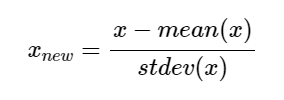

In [19]:
# 피처 스케일링 - 정규화

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_scaled_df = pd.DataFrame(iris_scaled, columns = iris_df.columns)
iris_scaled_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0


In [ ]:
다음과 같이 정규화 하는 것으로 데이터 값이 0~1 사이로 변환된다. (음수 역시 양수로 변환)

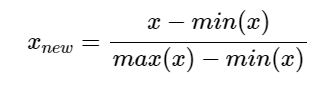

In [ ]:
# 스케일링 변환 시 유의사항

In [ ]:
스케일링 변환 시 학습/검증 데이터 모두 동일한 스케일링 기준으로 변환해야한다.

In [ ]:
train_arr = np.arange(0,11).reshape(-1,1)
test_arr = np.arange(0,6).reshape(-1,1)

# 1. 동일한 스케일링 기준
scaler = MinMaxScaler()
scaler.fit(train_arr)

train_scaled = scaler.transform(train_arr)
test_scaled = scaler.transform(test_arr)

print("#1. MinMaxScaler로 학습/검증 데이터 모두 10분의 1로 스케일링")
print("#1. 학습 데이터 스케일링:", train_scaled.reshape(-1))
print("#1. 검증 데이터 스케일링:", test_scaled.reshape(-1))
print("-"*80)

# 2. 학습/검증 데이터별 다른 스케일링 기준
scaler = MinMaxScaler()
scaler.fit(train_arr)

train_scaled = scaler.transform(train_arr)

scaler = MinMaxScaler()
scaler.fit(test_arr) # 검증 데이터로 다시 fit 적용

test_scaled = scaler.transform(test_arr)

print("#2. 학습 데이터: 10분의 1, 검증 데이터: 5분의 1로 스케일링")
print("#2. 학습 데이터 스케일링:", train_scaled.reshape(-1))
print("#2. 검증 데이터 스케일링:", test_scaled.reshape(-1))

#1. MinMaxScaler로 학습/검증 데이터 모두 10분의 1로 스케일링
#1. 학습 데이터 스케일링: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
#1. 검증 데이터 스케일링: [0.  0.1 0.2 0.3 0.4 0.5]
--------------------------------------------------------------------------------
#2. 학습 데이터: 10분의 1, 검증 데이터: 5분의 1로 스케일링
#2. 학습 데이터 스케일링: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
#2. 검증 데이터 스케일링: [0.  0.2 0.4 0.6 0.8 1. ]
